In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, datasets
from torch import nn
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

training_dataset = datasets.MNIST(root ='./data',train = True, download= True, transform = transform )
validation_dataset = datasets.MNIST(root ='./data',train = False, download= True, transform = transform )

training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle= True)
val_loader = torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=100,shuffle= False)

In [ ]:
"""for inputs,labels in training_loader:
    print (inputs.shape)
    inputs = inputs.view(inputs.shape[0],-1)
    print (inputs)
    print (inputs.shape)
    break 
    """

'for inputs,labels in training_loader:\n    print (inputs.shape)\n    inputs = inputs.view(inputs.shape[0],-1)\n    print (inputs)\n    print (inputs.shape)\n    break \n    '

In [ ]:
def image_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)  # channels height width to height width channel 
  image = image*np.array((0.5,0.5,0.5,0.5))+np.array((0.5,0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

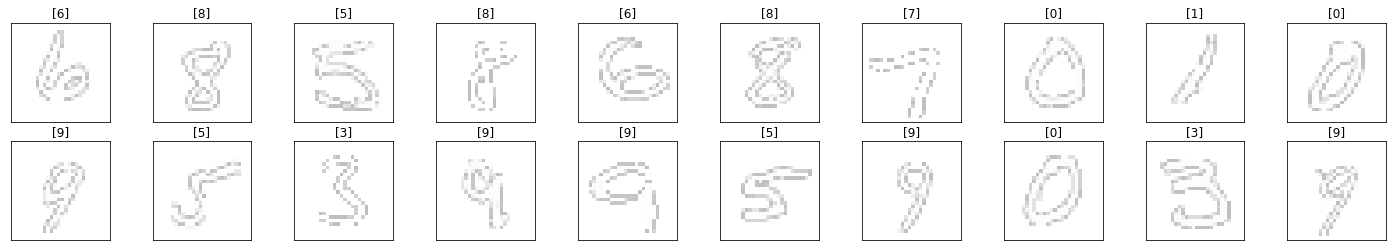

In [ ]:
dataiter = iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize =(25,4))

for index in np.arange(20):
  ax = fig.add_subplot(2,10,index+1,xticks=[],yticks=[])
  plt.imshow(image_convert(images[index]))
  ax.set_title ([labels[index].item()])



In [ ]:
class Classifier(nn.Module):
  def __init__(self, input_size, H1, H2, output_size):
    super().__init__()
    self.Linear1 = nn.Linear(input_size,H1)
    self.Linear2 = nn.Linear(H1, H2)
    self.Linear3 = nn.Linear (H2,output_size)

  def forward(self, x):
    x=F.relu(self.Linear1(x))
    x=F.relu(self.Linear2(x))
    x=self.Linear3(x)
    return x



In [ ]:
model = Classifier(784,125,65,10)
model

Classifier(
  (Linear1): Linear(in_features=784, out_features=125, bias=True)
  (Linear2): Linear(in_features=125, out_features=65, bias=True)
  (Linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)

In [ ]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_his = []
val_running_correct_his = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss= 0.0
  val_correct = 0.0

  for inputs,labels in training_loader:
    inputs = inputs.view(inputs.shape[0],-1)
    outputs = model(inputs)

    loss = criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds= torch.max(outputs,1)
    running_corrects+=torch.sum(preds == labels.data)


    running_loss+=loss.item()
  
  else:
    with torch.no_grad():
      for val_inputs,val_labels in val_loader:
        val_inputs = val_inputs.view(inputs.shape[0],-1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs,val_labels)

        _,val_preds= torch.max(val_outputs,1)
        val_correct+=torch.sum(val_preds == val_labels.data)
        val_running_loss+=val_loss.item()

    epoch_loss= running_loss/len(training_loader)
    epoch_accuracy= running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_accuracy)

    val_epoch_loss= val_running_loss/len(val_loader)
    val_epoch_accuracy= val_correct.float()/len(val_loader) 
    val_running_loss_his.append(val_epoch_loss)
    val_running_correct_his.append(val_epoch_accuracy)

    print ('epoch:', (e+1))

    print ("Training loss: {:.4f}, acc {:.4f}".format(epoch_loss,epoch_accuracy.item()))
    print ("Validation loss: {:.4f}, acc {:.4f}".format(val_epoch_loss,val_epoch_accuracy.item()))

epoch: 1
Training loss: 0.9416, acc 77.9283
Validation loss: 0.4270, acc 88.5100
epoch: 2
Training loss: 0.3828, acc 89.1833
Validation loss: 0.3332, acc 90.1500
epoch: 3
Training loss: 0.3221, acc 90.6233
Validation loss: 0.2876, acc 91.6200
epoch: 4
Training loss: 0.2867, acc 91.6983
Validation loss: 0.2660, acc 92.6100
epoch: 5
Training loss: 0.2593, acc 92.4767
Validation loss: 0.2395, acc 92.9900
epoch: 6
Training loss: 0.2362, acc 93.1583
Validation loss: 0.2235, acc 93.5700
epoch: 7
Training loss: 0.2183, acc 93.7350
Validation loss: 0.2068, acc 93.7900
epoch: 8
Training loss: 0.2028, acc 94.1183
Validation loss: 0.1920, acc 94.2600
epoch: 9
Training loss: 0.1885, acc 94.5750
Validation loss: 0.1856, acc 94.8800
epoch: 10
Training loss: 0.1768, acc 94.9200
Validation loss: 0.1727, acc 95.0400
epoch: 11
Training loss: 0.1659, acc 95.2667
Validation loss: 0.1701, acc 95.1300
epoch: 12
Training loss: 0.1559, acc 95.5300
Validation loss: 0.1651, acc 95.2900
epoch: 13
Training loss: 

[0.9415748696029186, 0.3828023879478375, 0.3221272228658199, 0.28669212352484463, 0.25926717930783827, 0.23620935487250486, 0.21834122809271017, 0.20275520719587803, 0.18846362755944332, 0.1768014733120799, 0.16586172999193272, 0.1559412592028578, 0.14748688150818148, 0.13927565576819081, 0.1316392943325142]


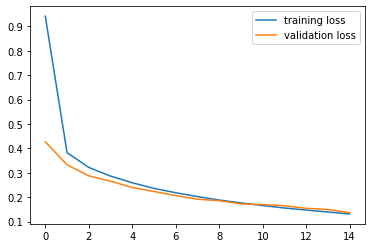

In [ ]:
print (running_loss_history)
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_his,label='validation loss')
plt.legend()

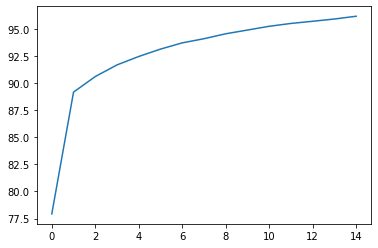

In [ ]:
plt.plot(running_corrects_history,label='training_Accuracy')

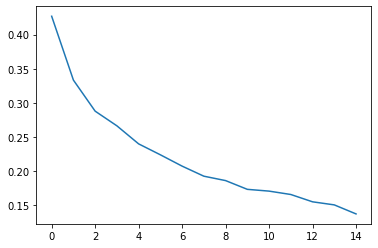

In [ ]:
plt.plot(val_running_loss_his,label='training_Accuracy')

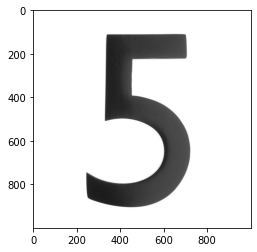

In [ ]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)

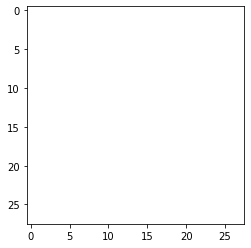

In [ ]:
import PIL.ImageOps
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(image_convert(img))

In [ ]:
img = img.view(img.shape[0],-1)
print (img.shape)
outputs = model(img)
val_loss = criterion(val_outputs,val_labels)
_,pred= torch.max(outputs,1)

print (pred.item())

torch.Size([1, 784])
5


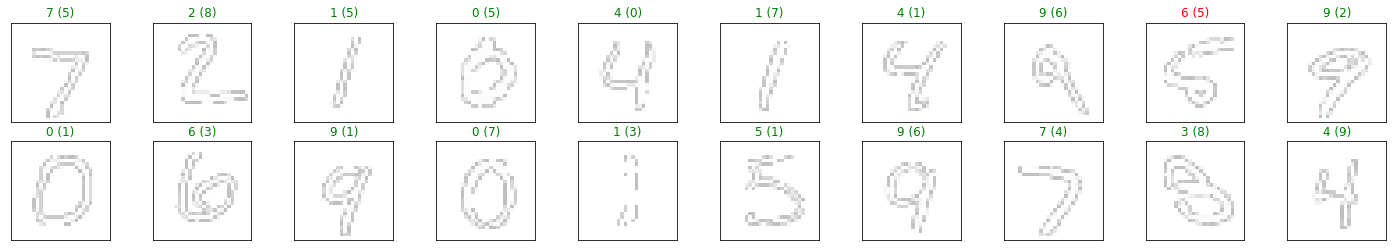

In [ ]:
dataiter = iter(val_loader)
images, label = dataiter.next()
images_ = images.view(images.shape[0],-1)
output = model(images_)
_,preds= torch.max(output,1)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(image_convert(images[idx]))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),color=("green" if preds[idx]==label[idx] else "red"))